<a href="https://colab.research.google.com/github/gongx030/etv2_pioneer/blob/master/Lmo2_track.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare a UCSC genome track for the Etv2 binding site at upstream of Lmo2
by Wuming Gong


In [29]:
start_time0 <- Sys.time()

In [30]:
options(max.print=1000)

### Install external packages

In [31]:
system('apt-get -q install libgsl-dev', intern = TRUE)

[1] "Reading package lists..."                                       
[2] "Building dependency tree..."                                    
[3] "Reading state information..."                                   
[4] "libgsl-dev is already the newest version (2.4+dfsg-6)."         
[5] "0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded."

In [32]:
system('apt-get install libcairo2-dev', intern = TRUE) # for Cairo package that is required by ComplexHeatmap package

[1] "Reading package lists..."                                         
[2] "Building dependency tree..."                                      
[3] "Reading state information..."                                     
[4] "libcairo2-dev is already the newest version (1.15.10-2ubuntu0.1)."
[5] "0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded."

## Install and load R packages

In [33]:
install.packages('BiocManager')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [34]:
required_packages <- c(
    'devtools', 'BiocManager', 
    'BSgenome.Mmusculus.UCSC.mm10',
    'gsl', 'DirichletMultinomial', 'motifmatchr', 'chromVAR'
)

In [35]:
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}

In [36]:
library(devtools)

### Install R packages that are not available on CRAN or Bioc

In [37]:
if (!require('chromVARmotifs'))
  devtools::install_github("GreenleafLab/chromVARmotifs")

In [38]:
library(dplyr)
library(BSgenome.Mmusculus.UCSC.mm10)
library(rtracklayer)
library(motifmatchr)
library(chromVARmotifs)

* MEF Mnase-seq: 
https://s3.msi.umn.edu/gongx030/datasets/dataset=Teif_version=20170321a/MEF_Coverage_pileup.bw

* D1 MEF Etv2 ChIP-seq:
https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/MEF_Dox_d1_Etv2_FE.bw

* EB 3h Etv2 ChIP-seq:
https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2PioneerChIPseq_version=20191203a/EB_Dox_3h_Etv2_FE.bw

* EB No Dox
https://s3.msi.umn.edu/gongx030/datasets/dataset=Etv2ATAC_version=20190228b/EB_NoDox_D25_mono_nucleosome_vs_nfr_seatac.bw

In [39]:
gr <- GRanges(seqnames = 'chr2', range = IRanges(103903799, width = 10000))
gr

GRanges object with 1 range and 0 metadata columns:
      seqnames              ranges strand
         <Rle>           <IRanges>  <Rle>
  [1]     chr2 103903799-103913798      *
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

In [40]:
?GRanges

In [41]:
data('homer_pwms')
homer_pwms['Etv2(ETS)/ES-ER71-ChIP-Seq(GSE59402)/Homer(0.967)']

PWMatrixList of length 1
names(1): Etv2(ETS)/ES-ER71-ChIP-Seq(GSE59402)/Homer(0.967)

Etv2 binding sites near Lmo2 locus

In [42]:
motif_ix <- matchMotifs(
  homer_pwms['Etv2(ETS)/ES-ER71-ChIP-Seq(GSE59402)/Homer(0.967)'], 
  gr,
  genome = BSgenome.Mmusculus.UCSC.mm10,
  p.cutoff = 5e-5,
  out = 'positions'
)[[1]]

In [43]:
as.data.frame(motif_ix)[, 1:3]

seqnames,start,end
<fct>,<int>,<int>
chr2,103906488,103906499
chr2,103904404,103904415
chr2,103904568,103904579
chr2,103906673,103906684


In [44]:
?matchMotifs

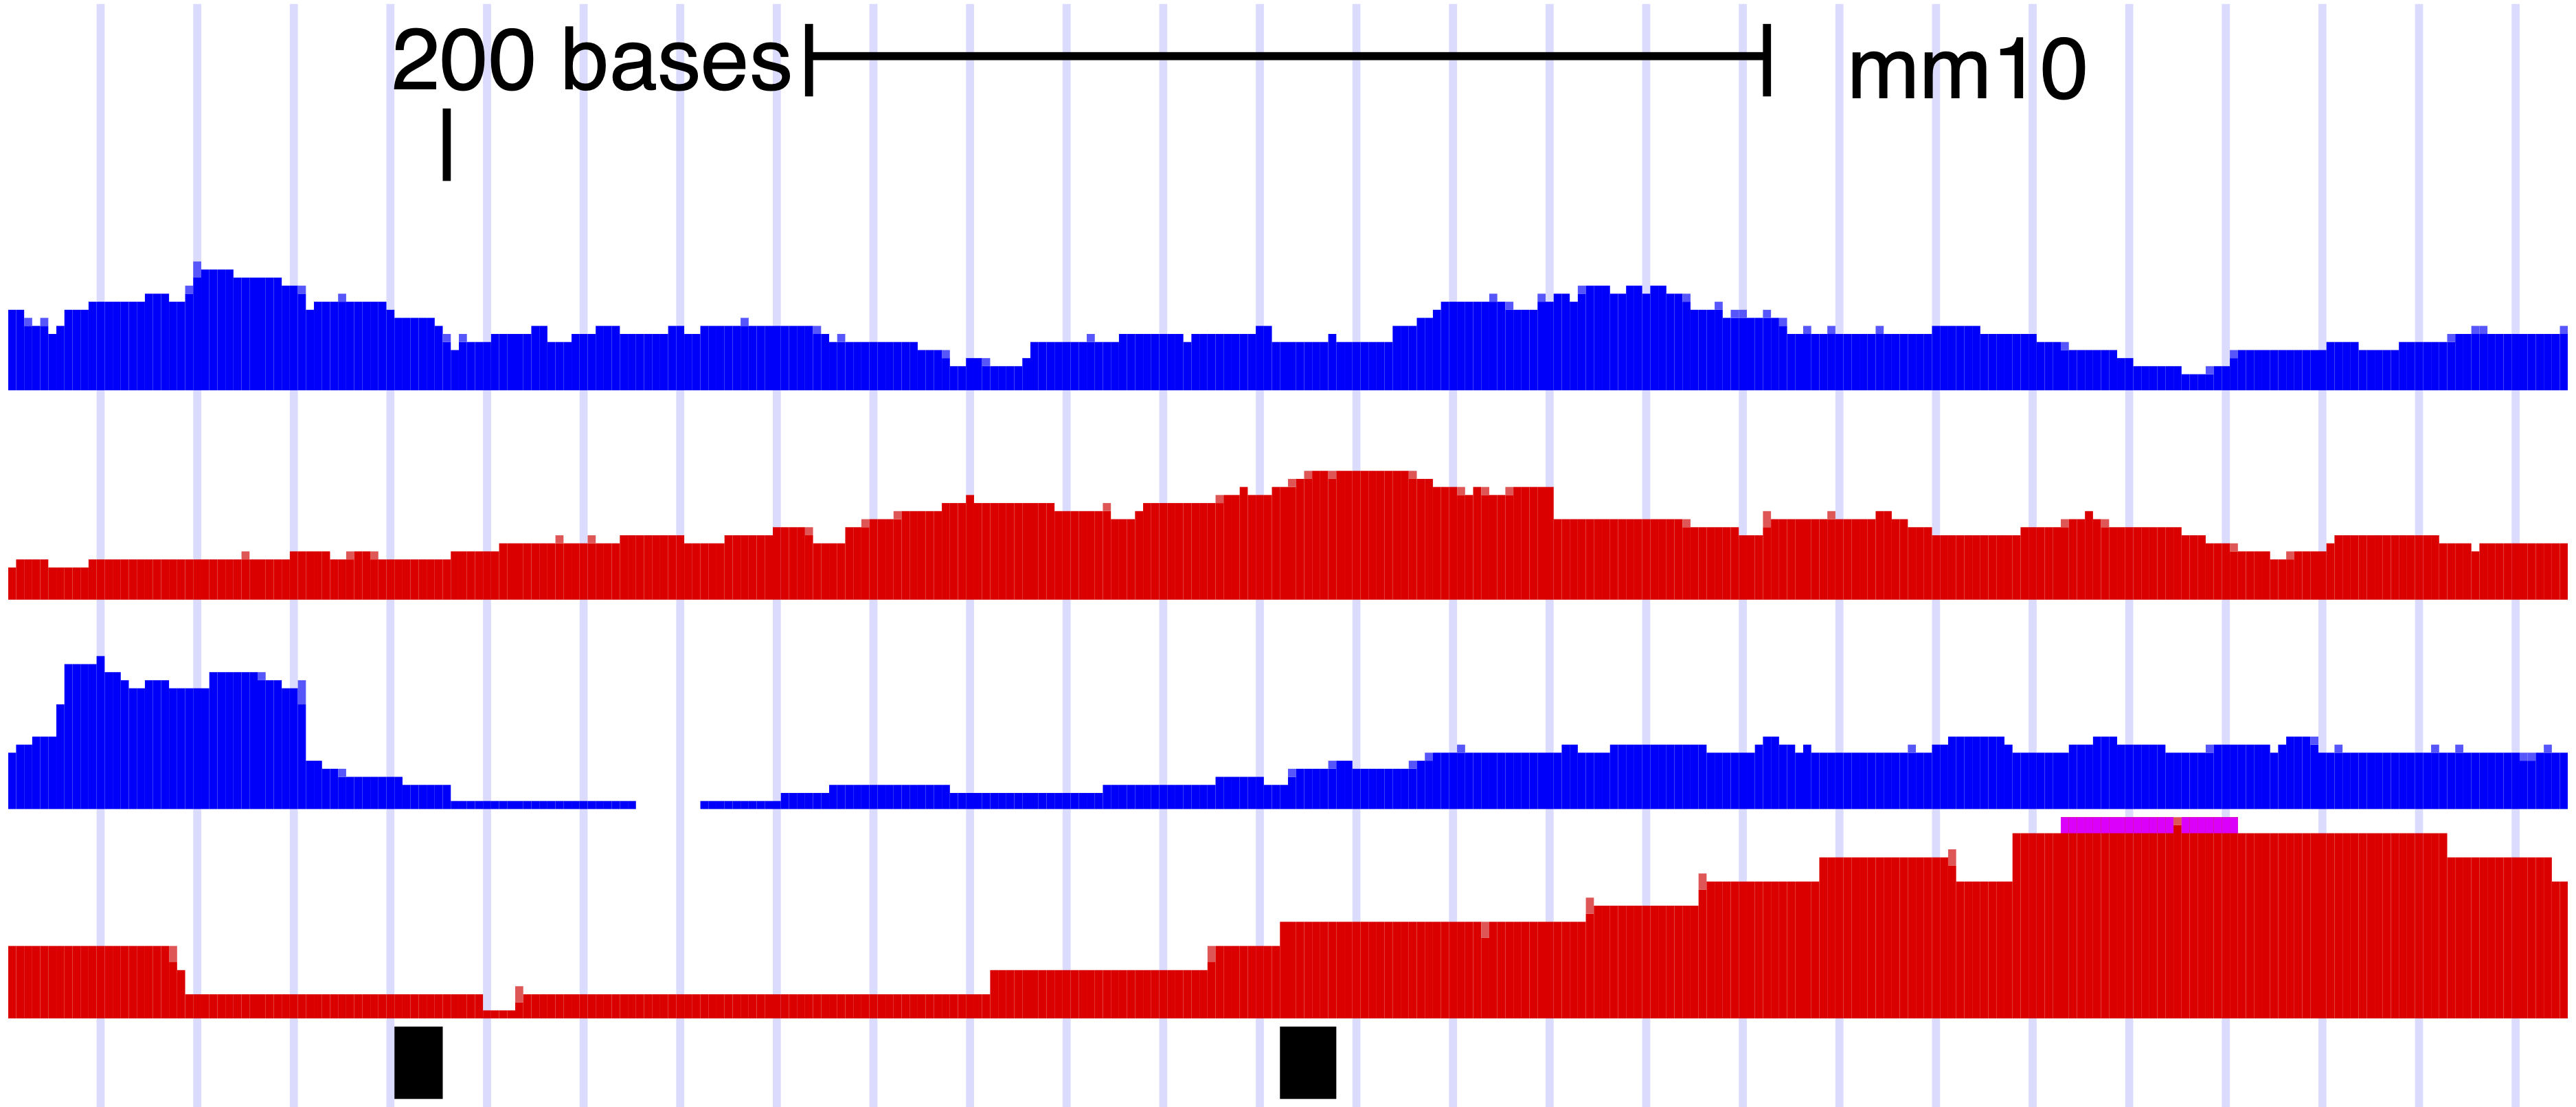

## SessionInfo

In [45]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    parallel  stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] motifmatchr_1.12.0                 BSgenome.Mmusculus.UCSC.mm10_1.4.0
 [3] BSgenome_1.58.0                    rtracklayer_1.50.0                
 [5] Biostrings_2.58.0                  XVector_0.30.0                    
 [7] GenomicRanges_1.

In [46]:
Sys.time() - start_time0

Time difference of 7.670979 secs